<a href="https://colab.research.google.com/github/bburt26/Final-Project/blob/main/final_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone in Fork

In [3]:
! git clone https://github.com/bburt26/Final-Project.git

Cloning into 'Final-Project'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 159 (delta 70), reused 43 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (159/159), 2.19 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
#!git config --global user.name "bburt26"
#!git config --global user.email "jtg3ts@virginia.edu"

In [ ]:
#%cd Final-Project

In [ ]:
#! git push origin main

# AI Acknowledgement

We acknowledge that we have used AI to the extent permitted by the UVA AI acceptable use policy. We are aware of the possibility of AI producing errors and offensive content and certify that we have taken the necessary measures to ensure that the work produced is both accurate and ethical to the best of our ability.

# Cleaning and Wrangling

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Final-Project/data/CVD Dataset.csv')

### --- Cleaning --- ###
columns_of_interest = ['Sex',	'Age',	'Weight (kg)',	'Height (m)',
                       'BMI',	'Total Cholesterol (mg/dL)',
                       'Fasting Blood Sugar (mg/dL)',
                       'Smoking Status',	'Diabetes Status',
                       'Physical Activity Level'	,
                       'Family History of CVD',	'CVD Risk Level',
                       'Systolic BP',	'Diastolic BP',	'Blood Pressure Category',
                      'CVD Risk Score'
                       ]
data_cleaned = data[columns_of_interest].copy()

# Replace Nulls with Mean
missing_numerical_cols = [
    'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Total Cholesterol (mg/dL)',
    'Fasting Blood Sugar (mg/dL)', 'Systolic BP', 'Diastolic BP', 'CVD Risk Score'
]
# Did not do this for categorical variables. That would arbitrarily skew data since
# the categories are often binary (eg. Sex would become 0 or 1 -- not enough of a
# range for mean replacement to be meaningful).

for col in missing_numerical_cols:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())


# Save cleaned dataframe to CSV
data_cleaned.to_csv('CVD_Cleaned.csv', index=False)


### --- Encoding Categorical Data --- ###
# Encode Sex as numeric
data_cleaned['Sex'] = data_cleaned['Sex'].map({'F': 0, 'M': 1})

# Encode BP Category as numeric
bp_map = {
    'Normal': 0,
    'Elevated': 1,
    'Hypertension Stage 1': 2,
    'Hypertension Stage 2': 3
}
data_cleaned['BP_Category_Label'] = data_cleaned['Blood Pressure Category'].map(bp_map)

# Encode Smoking Status
smoking_map = {'N': 0, 'Y': 1}
data_cleaned['Smoking_Status_Encoded'] = data_cleaned['Smoking Status'].map(smoking_map)

# Encode diabetes status
diabetes_map = {'N': 0, 'Y': 1}
data_cleaned['Diabetes_Status_Encoded'] = data_cleaned['Diabetes Status'].map(diabetes_map)

# Encode Physical Activity Level
physical_activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
data_cleaned['Physical_Activity_Level_Encoded'] = data_cleaned['Physical Activity Level'].map(physical_activity_map)

# Encode Family History of CVD
family_history_map = {'N': 0, 'Y': 1}
data_cleaned['Family_History_CVD_Encoded'] = data_cleaned['Family History of CVD'].map(family_history_map)

# Encode CVD Risk Level
cvd_risk_map = {'LOW': 0, 'INTERMEDIARY': 1, 'HIGH': 2}
data_cleaned['CVD_Risk_Level_Encoded'] = data_cleaned['CVD Risk Level'].map(cvd_risk_map)

print("Data types after encoding new columns:")
print(data_cleaned[['Smoking_Status_Encoded', 'Diabetes_Status_Encoded',
                    'Physical_Activity_Level_Encoded', 'Family_History_CVD_Encoded',
                    'CVD_Risk_Level_Encoded']].dtypes)

print("\nFirst 5 rows with new encoded columns:")
display(data_cleaned.head())

# Remove columns with encoded versions
columns_to_drop = [
    'Smoking Status',
    'Diabetes Status',
    'Physical Activity Level',
    'Family History of CVD',
    'CVD Risk Level',
    'Blood Pressure Category'
]

data_cleaned = data_cleaned.drop(columns=columns_to_drop)

# View
print("DataFrame after dropping original categorical columns:")
display(data_cleaned.head())
print("\nUpdated DataFrame Info:")
data_cleaned.info()

print("Missing values after imputation:")
print(data_cleaned[missing_numerical_cols].isnull().sum())
print("\nUpdated DataFrame Info:")
data_cleaned.info()


### ---- Save as modeling data --- ###
model_data = data_cleaned.copy()
model_data.head(10)


Data types after encoding new columns:
Smoking_Status_Encoded             int64
Diabetes_Status_Encoded            int64
Physical_Activity_Level_Encoded    int64
Family_History_CVD_Encoded         int64
CVD_Risk_Level_Encoded             int64
dtype: object

First 5 rows with new encoded columns:


,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,...,Systolic BP,Diastolic BP,Blood Pressure Category,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,N,Y,Low,...,125.0,79.0,Elevated,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,Y,Y,High,...,139.0,70.0,Hypertension Stage 1,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,N,N,High,...,104.0,77.0,Normal,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,N,N,High,...,140.0,83.0,Hypertension Stage 1,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,Y,Y,High,...,144.0,83.0,Hypertension Stage 1,17.88,2,1,1,2,0,1


DataFrame after dropping original categorical columns:


,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Systolic BP,Diastolic BP,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,125.0,79.0,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,139.0,70.0,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,104.0,77.0,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,140.0,83.0,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,144.0,83.0,17.88,2,1,1,2,0,1



Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sex                              1529 non-null   int64  
 1   Age                              1529 non-null   float64
 2   Weight (kg)                      1529 non-null   float64
 3   Height (m)                       1529 non-null   float64
 4   BMI                              1529 non-null   float64
 5   Total Cholesterol (mg/dL)        1529 non-null   float64
 6   Fasting Blood Sugar (mg/dL)      1529 non-null   float64
 7   Systolic BP                      1529 non-null   float64
 8   Diastolic BP                     1529 non-null   float64
 9   CVD Risk Score                   1529 non-null   float64
 10  BP_Category_Label                1529 non-null   int64  
 11  Smoking_Status_Encoded           1529 non-null   int64  


,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Systolic BP,Diastolic BP,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,125.000000,79.0,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,139.000000,70.0,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,104.000000,77.0,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,140.000000,83.0,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,144.000000,83.0,17.88,2,1,1,2,0,1
5,0,58.0000,117.900000,1.87,33.7,156.0,82.0,142.000000,90.0,16.96,3,1,0,1,1,2
6,1,33.0000,117.900000,1.82,35.6,184.0,87.0,96.000000,63.0,17.60,0,0,1,0,0,1
7,1,55.0000,100.100000,1.74,33.1,287.0,96.0,115.000000,73.0,18.11,0,1,0,1,0,2
8,0,37.0000,110.100000,1.86,31.8,177.0,70.0,125.627572,95.0,15.25,3,1,0,2,0,1
9,0,58.0000,97.600000,1.86,28.2,281.0,126.0,133.000000,83.0,17.91,2,0,0,1,0,1


# EDA

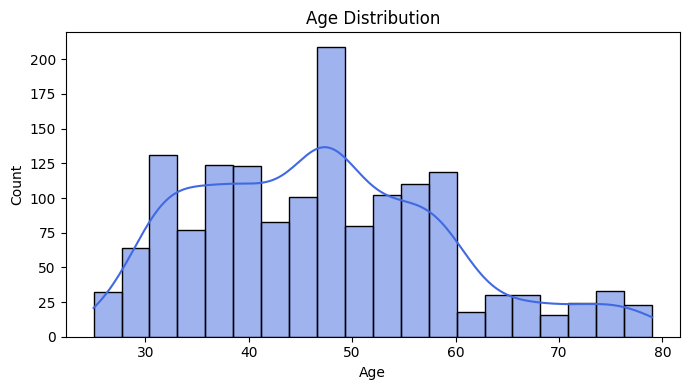

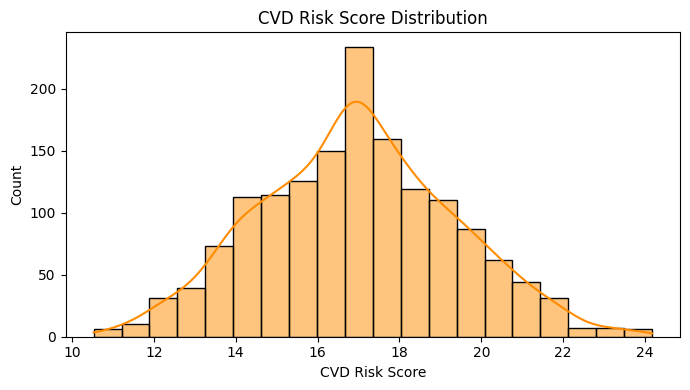

(1529, 16)
               Sex         Age  Weight (kg)   Height (m)          BMI  \
count  1529.000000  1529.00000  1529.000000  1529.000000  1529.000000   
mean      0.494441    47.02550    85.917427     1.754111    28.465997   
std       0.500133    12.09988    20.448054     0.110583     6.889701   
min       0.000000    25.00000    50.100000     1.502000    15.000000   
25%       0.000000    37.00000    67.970000     1.670000    22.811000   
50%       0.000000    47.00000    85.917427     1.754111    28.465997   
75%       1.000000    55.00000   104.100000     1.840000    33.700000   
max       1.000000    79.00000   120.000000     2.000000    46.200000   

       Total Cholesterol (mg/dL)  Fasting Blood Sugar (mg/dL)  Systolic BP  \
count                1529.000000                  1529.000000  1529.000000   
mean                  198.539148                   117.485636   125.627572   
std                    56.396652                    29.617668    21.592259   
min                

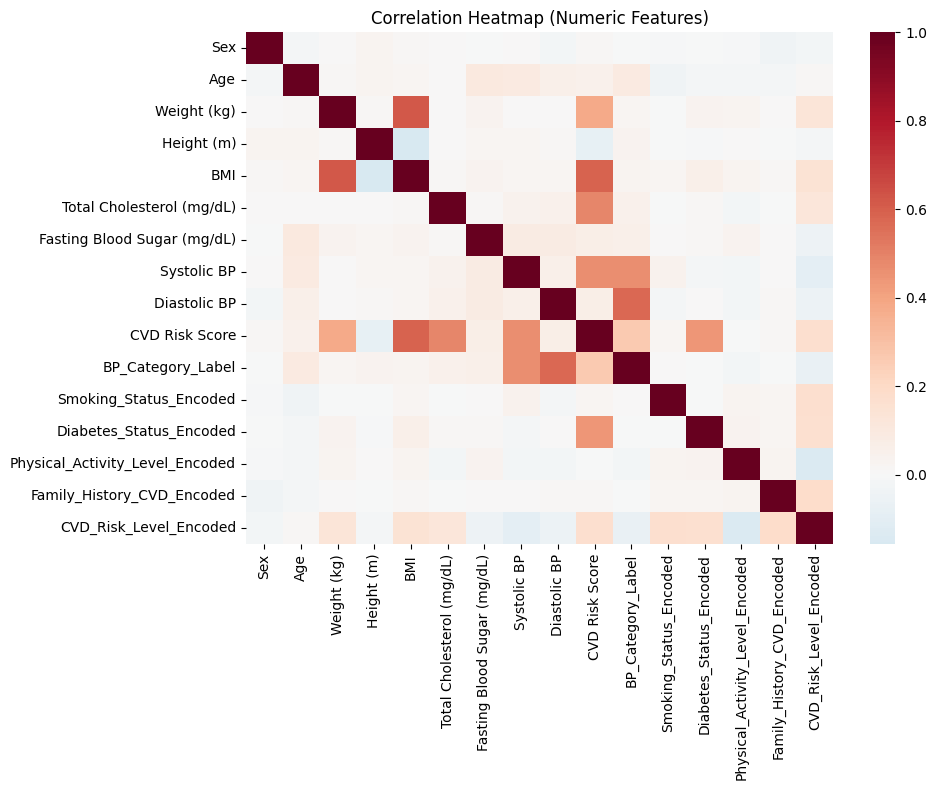

                         Age                         BMI                  \
                        mean        std count       mean       std count   
BP_Category_Label                                                          
0                  45.814523  10.576430   300  28.309853  6.858879   300   
1                  44.191020  10.293651   100  28.985000  7.469998   100   
2                  46.711801  11.698389   497  27.976358  7.012362   497   
3                  48.295514  13.178243   632  28.843044  6.697849   632   

                  Systolic BP                  Diastolic BP                   \
                         mean        std count         mean        std count   
BP_Category_Label                                                              
0                  105.743471   9.825420   300    69.812829   6.323141   300   
1                  124.697654   2.914994   100    70.643421   6.739413   100   
2                  127.511427  17.159625   497    83.145776   9.047

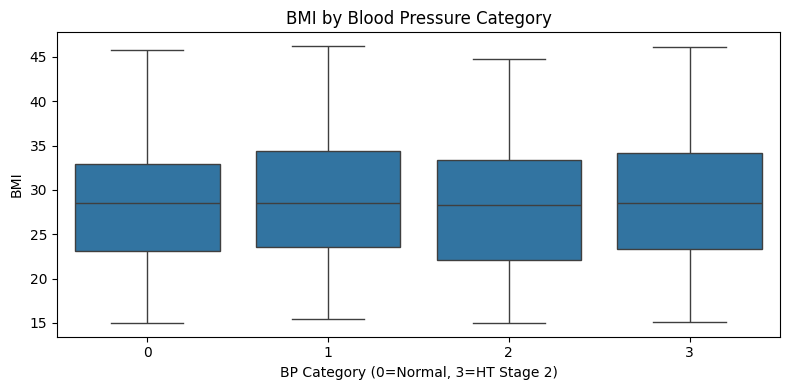

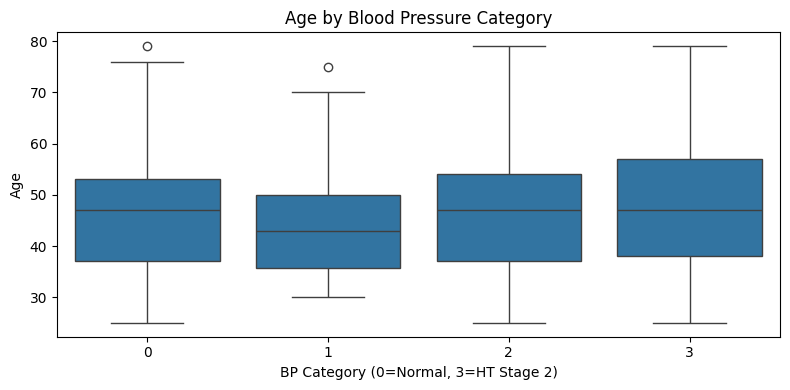

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot - age distribution
plt.figure(figsize=(7,4))
sns.histplot(model_data['Age'], bins=20, kde=True, color='royalblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

# Plot - cvd risk score
plt.figure(figsize=(7,4))
sns.histplot(model_data['CVD Risk Score'], bins=20, kde=True, color='darkorange')
plt.xlabel("CVD Risk Score")
plt.ylabel("Count")
plt.title("CVD Risk Score Distribution")
plt.tight_layout()
plt.show()

# Overview
# basic structure
print(model_data.shape)
# numeric summary
print(model_data.describe())
# missing values per column
print(model_data.isnull().sum())

# Correlation matrix and heatmap
numeric_cols = model_data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

# Group Summaries
# mean and std of key variables by blood pressure category
group_stats = model_data.groupby('BP_Category_Label')[['Age', 'BMI', 'Systolic BP', 'Diastolic BP',
                                                      'CVD Risk Score']].agg(['mean', 'std', 'count'])
print(group_stats)

# Boxplot of key predictors by BP Group
plt.figure(figsize=(8,4))
sns.boxplot(x='BP_Category_Label', y='BMI', data=model_data)
plt.xlabel("BP Category (0=Normal, 3=HT Stage 2)")
plt.ylabel("BMI")
plt.title("BMI by Blood Pressure Category")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='BP_Category_Label', y='Age', data=model_data)
plt.xlabel("BP Category (0=Normal, 3=HT Stage 2)")
plt.ylabel("Age")
plt.title("Age by Blood Pressure Category")
plt.tight_layout()
plt.show()





# LinReg - Blood Pressure Categories

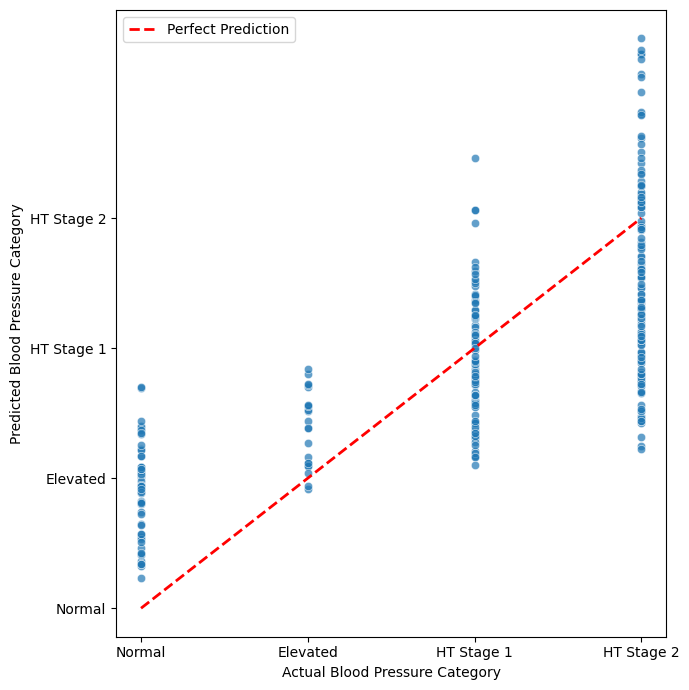

Test R^2: 0.534
Test RMSE: 0.781
| Feature                         |   Coefficient |   Importance |
|:--------------------------------|--------------:|-------------:|
| Height (m)                      |    0.306952   |   0.306952   |
| Diabetes_Status_Encoded         |   -0.200235   |   0.200235   |
| CVD Risk Score                  |    0.0867606  |   0.0867606  |
| Sex                             |    0.0489413  |   0.0489413  |
| Diastolic BP                    |    0.0438054  |   0.0438054  |
| Family_History_CVD_Encoded      |   -0.0377545  |   0.0377545  |
| BMI                             |   -0.0185923  |   0.0185923  |
| Systolic BP                     |    0.0175104  |   0.0175104  |
| CVD_Risk_Level_Encoded          |   -0.0146532  |   0.0146532  |
| Smoking_Status_Encoded          |    0.0052678  |   0.0052678  |
| Physical_Activity_Level_Encoded |   -0.00191524 |   0.00191524 |
| Age                             |    0.00191286 |   0.00191286 |
| Total Cholesterol (mg/dL)  

In [10]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Target variable
y = model_data['BP_Category_Label']

# drop the target variable
X = model_data.drop(columns=['BP_Category_Label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# prediction
y_pred = reg.predict(X_test)

# Plot
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2, label='Perfect Prediction'
)
plt.xlabel("Actual Blood Pressure Category")
plt.ylabel("Predicted Blood Pressure Category")

category_labels = ["Normal", "Elevated", "HT Stage 1", "HT Stage 2"]
int_ticks = np.arange(0, 4)
plt.xticks(int_ticks, category_labels)
plt.yticks(int_ticks, category_labels)

plt.legend()
plt.tight_layout()
plt.show()

# evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# Feature Importance
coefficients = reg.coef_
features = X_train.columns

fi_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
}).sort_values('Importance', ascending=False)

print(fi_df.to_markdown(index=False))

# Random Forest - Blood Pressure Categories

Random Forest – Classification Metrics (BP Category):
  Accuracy:          0.905
  Precision (macro): 0.877
  Recall (macro):    0.828
  F1-score (macro):  0.845

Detailed classification report:
              precision    recall  f1-score   support

      Normal       0.92      0.95      0.94        62
    Elevated       0.79      0.50      0.61        22
  HT Stage 1       0.86      0.92      0.89        90
  HT Stage 2       0.95      0.94      0.94       132

    accuracy                           0.91       306
   macro avg       0.88      0.83      0.84       306
weighted avg       0.90      0.91      0.90       306



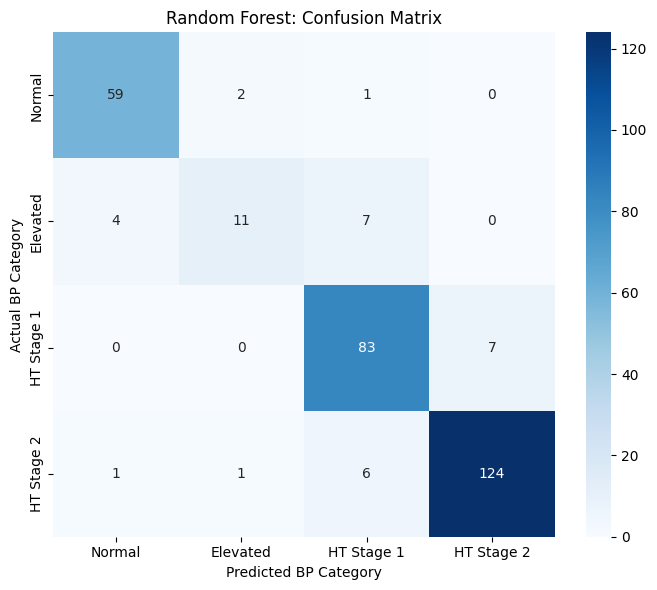


Random Forest – Feature Importances:
| Feature                         |   Importance |
|:--------------------------------|-------------:|
| Diastolic BP                    |   0.341537   |
| Systolic BP                     |   0.248073   |
| CVD Risk Score                  |   0.0615904  |
| BMI                             |   0.0513336  |
| Fasting Blood Sugar (mg/dL)     |   0.0489528  |
| Weight (kg)                     |   0.0486509  |
| Height (m)                      |   0.0467492  |
| Total Cholesterol (mg/dL)       |   0.0465971  |
| Age                             |   0.0448253  |
| Physical_Activity_Level_Encoded |   0.014876   |
| CVD_Risk_Level_Encoded          |   0.0126983  |
| Diabetes_Status_Encoded         |   0.00885204 |
| Smoking_Status_Encoded          |   0.00853311 |
| Sex                             |   0.00845077 |
| Family_History_CVD_Encoded      |   0.00828039 |


In [11]:
# updated
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)



# Classification metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision_macro = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

print("Random Forest – Classification Metrics (BP Category):")
print(f"  Accuracy:          {accuracy:.3f}")
print(f"  Precision (macro): {precision_macro:.3f}")
print(f"  Recall (macro):    {recall_macro:.3f}")
print(f"  F1-score (macro):  {f1_macro:.3f}")

print("\nDetailed classification report:")
print(classification_report(y_test, y_pred_rf, target_names=["Normal", "Elevated", "HT Stage 1", "HT Stage 2"], zero_division=0))

# Confusion matrix plot
plt.figure(figsize=(7,6))
cm = confusion_matrix(y_test, y_pred_rf)
category_labels = ["Normal", "Elevated", "HT Stage 1", "HT Stage 2"]

sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=category_labels,
    yticklabels=category_labels
)
plt.xlabel("Predicted BP Category")
plt.ylabel("Actual BP Category")
plt.title("Random Forest: Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature importance
feature_importances = rf.feature_importances_
features = X_train.columns

fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("\nRandom Forest – Feature Importances:")
print(fi_df.to_markdown(index=False))


# Linear Regression vs. Random Forest - Blood Pressure Categories

In [12]:
import pandas as pd

bp_results = {
    "Model": ["Linear Regression", "Random Forest"],
    "R^2": [0.534, 0.893],
    "RMSE": [0.78, 0.37]
}

bp_results_df = pd.DataFrame(bp_results)

print("Model Evaluation Comparison Table:")
display(bp_results_df)


Model Evaluation Comparison Table:


,Model,R^2,RMSE
0,Linear Regression,0.534,0.78
1,Random Forest,0.893,0.37


In [ ]:
model_data.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Systolic BP,Diastolic BP,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,125.000000,79.0,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,139.000000,70.0,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,104.000000,77.0,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,140.000000,83.0,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,144.000000,83.0,17.88,2,1,1,2,0,1
5,0,58.0000,117.900000,1.87,33.7,156.0,82.0,142.000000,90.0,16.96,3,1,0,1,1,2
6,1,33.0000,117.900000,1.82,35.6,184.0,87.0,96.000000,63.0,17.60,0,0,1,0,0,1
7,1,55.0000,100.100000,1.74,33.1,287.0,96.0,115.000000,73.0,18.11,0,1,0,1,0,2
8,0,37.0000,110.100000,1.86,31.8,177.0,70.0,125.627572,95.0,15.25,3,1,0,2,0,1
9,0,58.0000,97.600000,1.86,28.2,281.0,126.0,133.000000,83.0,17.91,2,0,0,1,0,1


# Systolic Blood Pressure - Linear Regression

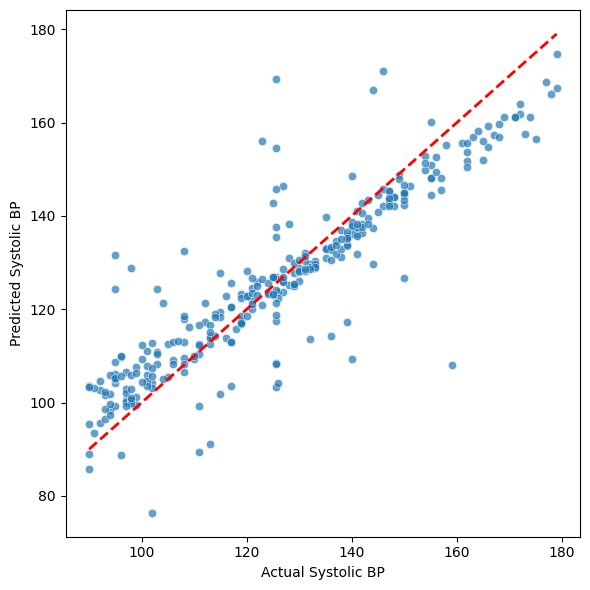

Systolic BP Model:
R^2: 0.804
RMSE: 9.87
Systolic BP Model - Feature Importance:
| Feature                         |   Coefficient |   Importance |
|:--------------------------------|--------------:|-------------:|
| Diabetes_Status_Encoded         |  -27.0723     |  27.0723     |
| CVD Risk Score                  |   14.001      |  14.001      |
| BMI                             |   -2.55108    |   2.55108    |
| BP_Category_Label               |    2.18462    |   2.18462    |
| CVD_Risk_Level_Encoded          |   -1.3446     |   1.3446     |
| Smoking_Status_Encoded          |    1.31094    |   1.31094    |
| Height (m)                      |    0.987648   |   0.987648   |
| Family_History_CVD_Encoded      |    0.807962   |   0.807962   |
| Total Cholesterol (mg/dL)       |   -0.260561   |   0.260561   |
| Sex                             |    0.235469   |   0.235469   |
| Weight (kg)                     |   -0.0461374  |   0.0461374  |
| Age                             |    0.0122068

In [20]:
# predictors
X_sys = model_data.drop(columns=['Systolic BP', 'Diastolic BP'])
y_sys = model_data['Systolic BP']

# train-test split
X_train_sys, X_test_sys, y_train_sys, y_test_sys = train_test_split(
    X_sys, y_sys, test_size=0.2, random_state=42
)

# linear regression
reg_sys = LinearRegression()
reg_sys.fit(X_train_sys, y_train_sys)
y_pred_sys = reg_sys.predict(X_test_sys)

# visualization
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_sys, y=y_pred_sys, alpha=0.7)
plt.plot([y_test_sys.min(), y_test_sys.max()], [y_test_sys.min(), y_test_sys.max()], 'r--', lw=2)
plt.xlabel("Actual Systolic BP")
plt.ylabel("Predicted Systolic BP")
plt.tight_layout()
plt.show()

# evaluation
r2_sys = r2_score(y_test_sys, y_pred_sys)
rmse_sys = np.sqrt(mean_squared_error(y_test_sys, y_pred_sys))

print("Systolic BP Model:")
print(f"R^2: {r2_sys:.3f}")
print(f"RMSE: {rmse_sys:.2f}")

# Feature importance
coefficients_sys = reg_sys.coef_
features_sys = X_train_sys.columns
fi_df_sys = pd.DataFrame({
    'Feature': features_sys,
    'Coefficient': coefficients_sys,
    'Importance': abs(coefficients_sys)
}).sort_values('Importance', ascending=False)

# plot
print("Systolic BP Model - Feature Importance:")
print(fi_df_sys.to_markdown(index=False))

# Diastolic Blood Pressure - Linear Regression

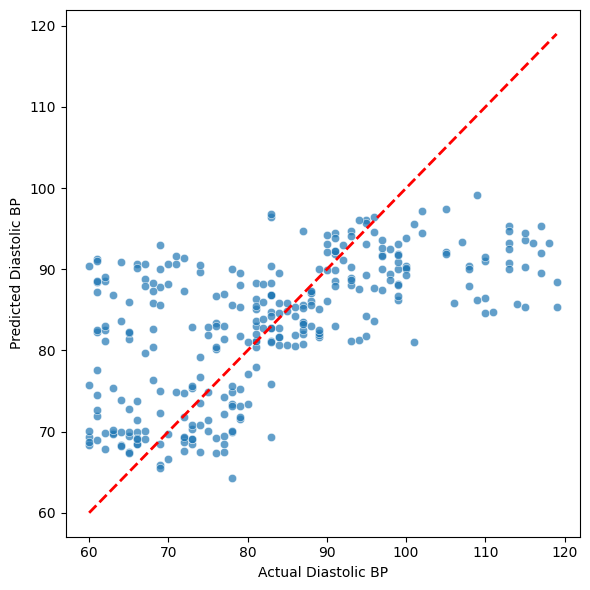

Diastolic BP Model:
R^2: 0.356
RMSE: 12.19

Diastolic BP Model - Feature Importance:
| Feature                         |   Coefficient |   Importance |
|:--------------------------------|--------------:|-------------:|
| BP_Category_Label               |    8.29327    |   8.29327    |
| Diabetes_Status_Encoded         |    5.50003    |   5.50003    |
| CVD Risk Score                  |   -2.50039    |   2.50039    |
| Height (m)                      |   -2.39129    |   2.39129    |
| Sex                             |   -1.05453    |   1.05453    |
| CVD_Risk_Level_Encoded          |   -0.927358   |   0.927358   |
| Family_History_CVD_Encoded      |    0.676231   |   0.676231   |
| BMI                             |    0.609631   |   0.609631   |
| Physical_Activity_Level_Encoded |   -0.563259   |   0.563259   |
| Smoking_Status_Encoded          |   -0.315929   |   0.315929   |
| Total Cholesterol (mg/dL)       |    0.0542544  |   0.0542544  |
| Weight (kg)                     |   -0.036

In [16]:
# Predictors
X_dia = model_data.drop(columns=['Systolic BP', 'Diastolic BP'])
y_dia = model_data['Diastolic BP']

# train-test split
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(
    X_dia, y_dia, test_size=0.2, random_state=42
)

#  linear regression
reg_dia = LinearRegression()
reg_dia.fit(X_train_dia, y_train_dia)
y_pred_dia = reg_dia.predict(X_test_dia)

# visualization
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_dia, y=y_pred_dia, alpha=0.7)
plt.plot([y_test_dia.min(), y_test_dia.max()], [y_test_dia.min(), y_test_dia.max()], 'r--', lw=2)
plt.xlabel("Actual Diastolic BP")
plt.ylabel("Predicted Diastolic BP")
plt.tight_layout()
plt.show()

# evaluation
r2_dia = r2_score(y_test_dia, y_pred_dia)
rmse_dia = np.sqrt(mean_squared_error(y_test_dia, y_pred_dia))

print("Diastolic BP Model:")
print(f"R^2: {r2_dia:.3f}")
print(f"RMSE: {rmse_dia:.2f}")

# Feature importance
coefficients_dia = reg_dia.coef_
features_dia = X_train_dia.columns
fi_df_dia = pd.DataFrame({
    'Feature': features_dia,
    'Coefficient': coefficients_dia,
    'Importance': abs(coefficients_dia)
}).sort_values('Importance', ascending=False)

# Plot
print("\nDiastolic BP Model - Feature Importance:")
print(fi_df_dia.to_markdown(index=False))


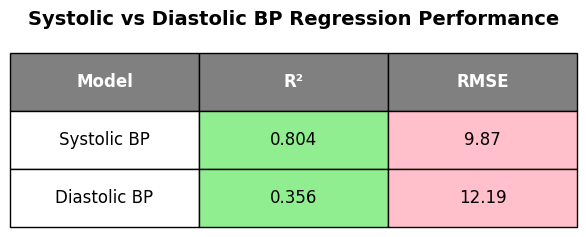

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

r2_sys = 0.804
r2_dia = 0.356
rmse_sys = 9.87
rmse_dia = 12.19

bp_comparison = {
    'Model': ['Systolic BP', 'Diastolic BP'],
    'R²': [r2_sys, r2_dia],
    'RMSE': [rmse_sys, rmse_dia]
}

bp_df = pd.DataFrame(bp_comparison)

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')

table = ax.table(cellText=bp_df.values,
                 colLabels=bp_df.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

# Full solid borders
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 2)

# Header
for i in range(len(bp_df.columns)):
    table[(0, i)].set_facecolor('grey')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Data rows
for i in range(2):
    table[(i+1, 0)].set_facecolor('white')
    table[(i+1, 1)].set_facecolor('lightgreen')
    table[(i+1, 2)].set_facecolor('pink')

plt.title('Systolic vs Diastolic BP Regression Performance',
          fontweight='bold', pad=20, fontsize=14)
plt.tight_layout()
plt.show()
